In [1]:
import pandas as pd
import json
import mysql.connector
import numpy as np             
import matplotlib.pyplot as plt
import pprint
import math
import os
import gc
import random
import seaborn as sns
from IPython.display import Markdown, display
from scipy import stats  
import plotly.express as px
from scipy.stats import shapiro, probplot, zscore, boxcox

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

In [2]:
with open('config/db_config.json', 'r') as config_file:
    db_config = json.load(config_file)

In [3]:
conn = mysql.connector.connect(
    host=db_config['host'],
    port=db_config['port'],
    user=db_config['user'],
    password=db_config['password'],
    database=db_config['database']
)

In [4]:
sql_query =""" select * from album """
album = pd.read_sql(sql_query, conn)
sql_query2 =""" select * from artist """
artist = pd.read_sql(sql_query2, conn)
sql_query3 =""" select * from customer """
customer = pd.read_sql(sql_query3, conn)
sql_query4 =""" select * from employee """
employee = pd.read_sql(sql_query4, conn)
sql_query5 =""" select * from genre """
genre = pd.read_sql(sql_query5, conn)
sql_query6 =""" select * from invoice """
invoice = pd.read_sql(sql_query6, conn)
sql_query7 =""" select * from invoiceline """
invoiceline = pd.read_sql(sql_query7, conn)
sql_query8 =""" select * from mediatype """
mediatype = pd.read_sql(sql_query8, conn)
sql_query9 =""" select * from playlist """
playlist = pd.read_sql(sql_query9, conn)
sql_query10 =""" select * from playlisttrack """
playlisttrack = pd.read_sql(sql_query10, conn)
sql_query11 =""" select * from track """
track = pd.read_sql(sql_query11, conn)

C:\Users\arell\AppData\Local\Temp\ipykernel_12252\3761654851.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  album = pd.read_sql(sql_query, conn)
C:\Users\arell\AppData\Local\Temp\ipykernel_12252\3761654851.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  artist = pd.read_sql(sql_query2, conn)
C:\Users\arell\AppData\Local\Temp\ipykernel_12252\3761654851.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer = pd.read_sql(sql_query3, conn)
C:\Users\arell\AppData\Local\Temp\ipykernel_12252\3761654851.py:8: UserWa

In [5]:
dataframes = [album, artist, customer, employee, genre, invoice, invoiceline, mediatype, playlist, playlisttrack, track]

# List of DataFrame names corresponding to the DataFrames
df_names = ['album', 'artist', 'customer', 'employee', 'genre', 'invoice', 'invoiceline', 'mediatype', 'playlist', 'playlisttrack', 'track']

# Function to display DataFrame information
def display_dataframe_info(df, df_name):
    print(f"Info for DataFrame '{df_name}':")
    df.info()
    print("\n")
    
# Iterate over the DataFrames and display their info
for track, name in zip(dataframes, df_names):
    display_dataframe_info(track, name)

Info for DataFrame 'album':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   AlbumId   347 non-null    int64 
 1   Title     347 non-null    object
 2   ArtistId  347 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.3+ KB


Info for DataFrame 'artist':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


Info for DataFrame 'customer':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-nul

In [6]:
# Check each DataFrame for null columns
for df_name, track in zip(df_names, dataframes):
    null_columns = track.columns[track.isnull().any()].tolist()
    if null_columns:
        print(f"{df_name} has null values in columns: {null_columns}")

customer has null values in columns: ['Company', 'State', 'PostalCode', 'Phone', 'Fax']
employee has null values in columns: ['ReportsTo']
invoice has null values in columns: ['BillingState', 'BillingPostalCode']
track has null values in columns: ['Composer']


In [7]:
dataframes = [album, artist, customer, employee, genre, invoice, invoiceline, mediatype, playlist, playlisttrack, track]

# List of DataFrame names corresponding to the DataFrames
df_names = ['album', 'artist', 'customer', 'employee', 'genre', 'invoice', 'invoiceline', 'mediatype', 'playlist', 'playlisttrack', 'track']

# Function to display DataFrame information
def display_dataframe_info(df, df_name):
    print(f"number of null for DataFrame '{df_name}':")
    num = df.isnull().sum()
    print(num)
    
# Iterate over the DataFrames and display their info
for track, name in zip(dataframes, df_names):
    display_dataframe_info(track, name)

number of null for DataFrame 'album':
AlbumId     0
Title       0
ArtistId    0
dtype: int64
number of null for DataFrame 'artist':
ArtistId    0
Name        0
dtype: int64
number of null for DataFrame 'customer':
CustomerId       0
FirstName        0
LastName         0
Company         49
Address          0
City             0
State           29
Country          0
PostalCode       4
Phone            1
Fax             47
Email            0
SupportRepId     0
dtype: int64
number of null for DataFrame 'employee':
EmployeeId    0
LastName      0
FirstName     0
Title         0
ReportsTo     1
BirthDate     0
HireDate      0
Address       0
City          0
State         0
Country       0
PostalCode    0
Phone         0
Fax           0
Email         0
dtype: int64
number of null for DataFrame 'genre':
GenreId    0
Name       0
dtype: int64
number of null for DataFrame 'invoice':
InvoiceId              0
CustomerId             0
InvoiceDate            0
BillingAddress         0
BillingCity    

In [8]:
dataframes = {
    'album': album,
    'artist': artist,
    'customer': customer,
    'employee': employee,
    'genre': genre,
    'invoice': invoice,
    'invoiceline': invoice,
    'mediatype': mediatype,
    'playlist': playlist,
    'playlisttrack': playlisttrack,
    'track': invoice,
}

# Function to drop duplicates for each DataFrame
def drop_duplicates_for_all_dfs(dfs):
    for name, df in dfs.items():
        # Drop duplicates
        original_count = df.shape[0]
        df_cleaned = df.drop_duplicates()
        cleaned_count = df_cleaned.shape[0]
        
        # Print results
        print(f"Dropped duplicates from '{name}': {original_count - cleaned_count} duplicates removed.")
        
        # Update the dictionary with the cleaned DataFrame
        dfs[name] = df_cleaned

    return dfs

# Drop duplicates and update the DataFrames
cleaned_dataframes = drop_duplicates_for_all_dfs(dataframes)

Dropped duplicates from 'album': 0 duplicates removed.
Dropped duplicates from 'artist': 0 duplicates removed.
Dropped duplicates from 'customer': 0 duplicates removed.
Dropped duplicates from 'employee': 0 duplicates removed.
Dropped duplicates from 'genre': 0 duplicates removed.
Dropped duplicates from 'invoice': 0 duplicates removed.
Dropped duplicates from 'invoiceline': 0 duplicates removed.
Dropped duplicates from 'mediatype': 0 duplicates removed.
Dropped duplicates from 'playlist': 0 duplicates removed.
Dropped duplicates from 'playlisttrack': 0 duplicates removed.
Dropped duplicates from 'track': 0 duplicates removed.


In [9]:
# Function to describe categorical columns in each DataFrame
def describe_categorical_dfs(dfs):
    descriptions = {}
    for name, df in dfs.items():
        # Select only categorical columns
        categorical_cols = df.select_dtypes(include='object')
        
        if not categorical_cols.empty:
            # Get description for categorical columns
            description = categorical_cols.describe()
            descriptions[name] = description
            
            # Print the description
            print(f"Description of categorical columns in '{name}':")
            print(description)
            print("\n" + "="*40 + "\n")  # Separator for readability
        else:
            print(f"No categorical columns in '{name}'.")

    return descriptions

# Describe categorical columns in all DataFrames
descriptions = describe_categorical_dfs(dataframes)

Description of categorical columns in 'album':
                                                    Title
count                                                 347
unique                                                347
top     Koyaanisqatsi (Soundtrack from the Motion Pict...
freq                                                    1


Description of categorical columns in 'artist':
                         Name
count                     275
unique                    275
top     Philip Glass Ensemble
freq                        1


Description of categorical columns in 'customer':
       FirstName   LastName                                           Company  \
count         59         59                                                10   
unique        57         59                                                10   
top        Frank  Gonçalves  Embraer - Empresa Brasileira de Aeronáutica S.A.   
freq           2          1                                                 1   

     

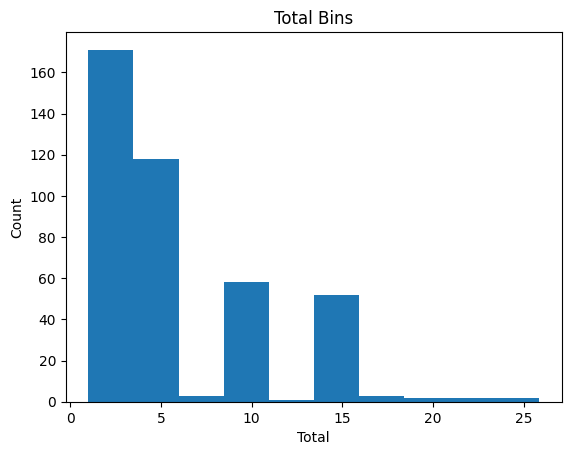

**Value Range**

Low ( 0.99 -  9.28)

Medium ( 9.28 -  17.57)

High ( 17.57 -  25.86)

,Total,Total-binned
0,1.98,Low
1,3.96,Low
2,5.94,Low
3,8.91,Low
4,13.86,Medium
5,0.99,Low
6,1.98,Low
7,1.98,Low
8,3.96,Low
9,5.94,Low


<br>**Binning Distribution**<br>

Total-binned
Low       347
Medium     58
High        7
Name: count, dtype: int64

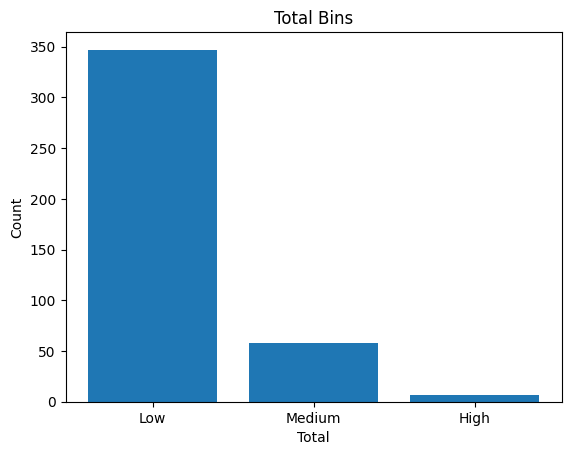

In [10]:
def binning_feature(feature):
    plt.hist(invoice[feature])

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

    bins = np.linspace(min(invoice[feature]), max(invoice[feature]), 4)
    
    printmd("**Value Range**")
    
    printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
    printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
    printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")

    group_names = ['Low', 'Medium', 'High']

    invoice.insert(invoice.shape[1]-1,f'{feature}-binned', pd.cut(invoice[feature], bins, labels=group_names, include_lowest=True))
    display(invoice[[feature, f'{feature}-binned']].head(10))


    # count values
    printmd("<br>**Binning Distribution**<br>")
    display(invoice[f'{feature}-binned'].value_counts())


    # plot the distribution of each bin
    plt.bar(group_names, invoice[f'{feature}-binned'].value_counts())
    # px.bar(data_canada, x='year', y='pop')

    # set x/y labels and plot title
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

binning_feature('Total')

In [11]:
stat, p = stats.normaltest(invoice['Total'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=77.62089, p=0.000
Sample does not look Gaussian (reject H0)


In [12]:
stat, p = stats.normaltest(invoiceline['UnitPrice'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1865.03362, p=0.000
Sample does not look Gaussian (reject H0)


In [15]:
stat, p = stats.normaltest(invoiceline['UnitPrice'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1865.03362, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
result = stats.anderson(invoice['Total'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 23.419
Significance level 15.00 % : critical value 0.571, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.650, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.780, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.909, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.082, data does not look normal (reject H0)


In [18]:
result = stats.anderson(invoiceline['UnitPrice'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 809.637
Significance level 15.00 % : critical value 0.575, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.655, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.786, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.916, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.090, data does not look normal (reject H0)


In [19]:
result = stats.anderson(invoiceline['UnitPrice'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 809.637
Significance level 15.00 % : critical value 0.575, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.655, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.786, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.916, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.090, data does not look normal (reject H0)


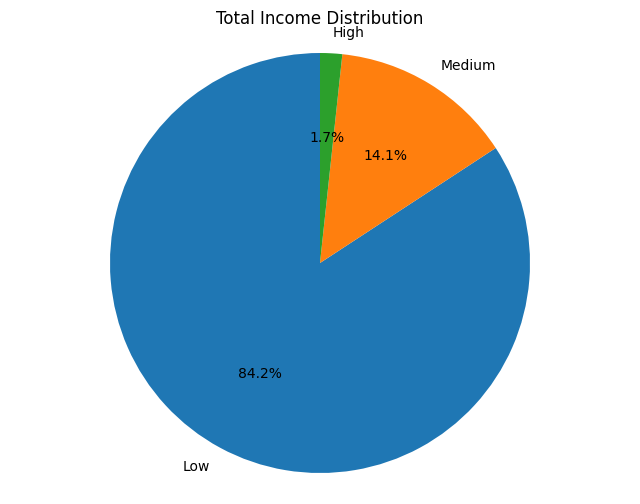

In [20]:
def plot_pie_chart(feature):
    # Count values for the binned feature
    binned_counts = invoice[f'{feature}-binned'].value_counts()

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(binned_counts, labels=binned_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"{feature.title()} Income Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is round
    plt.show()

# Then, plot the pie chart
plot_pie_chart('Total')


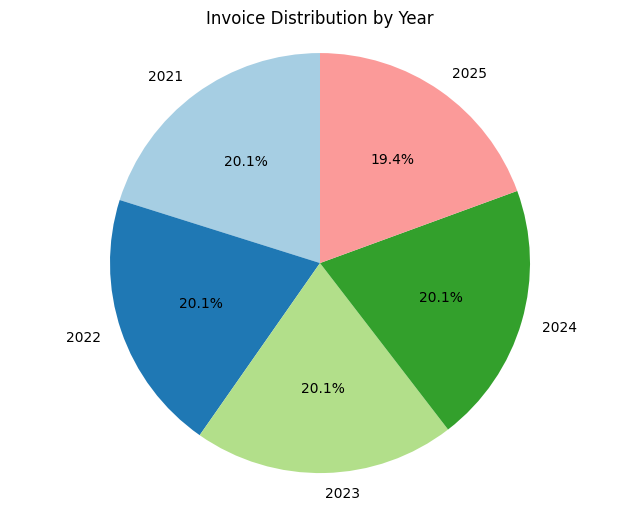

In [21]:
# Convert InvoiceDate to datetime
invoice['InvoiceDate'] = pd.to_datetime(invoice['InvoiceDate'])

# Extract the year from InvoiceDate
invoice['Year'] = invoice['InvoiceDate'].dt.year

# Count the number of invoices per year
yearly_counts = invoice['Year'].value_counts().reset_index()
yearly_counts.columns = ['Year', 'Count']  # Set column names correctly

# Prepare data for pie chart
labels = yearly_counts['Year']
sizes = yearly_counts['Count']
colors = plt.cm.Paired(range(len(labels)))  # Set colors for the pie chart

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add title
plt.title('Invoice Distribution by Year')

# Show the plot
plt.show()

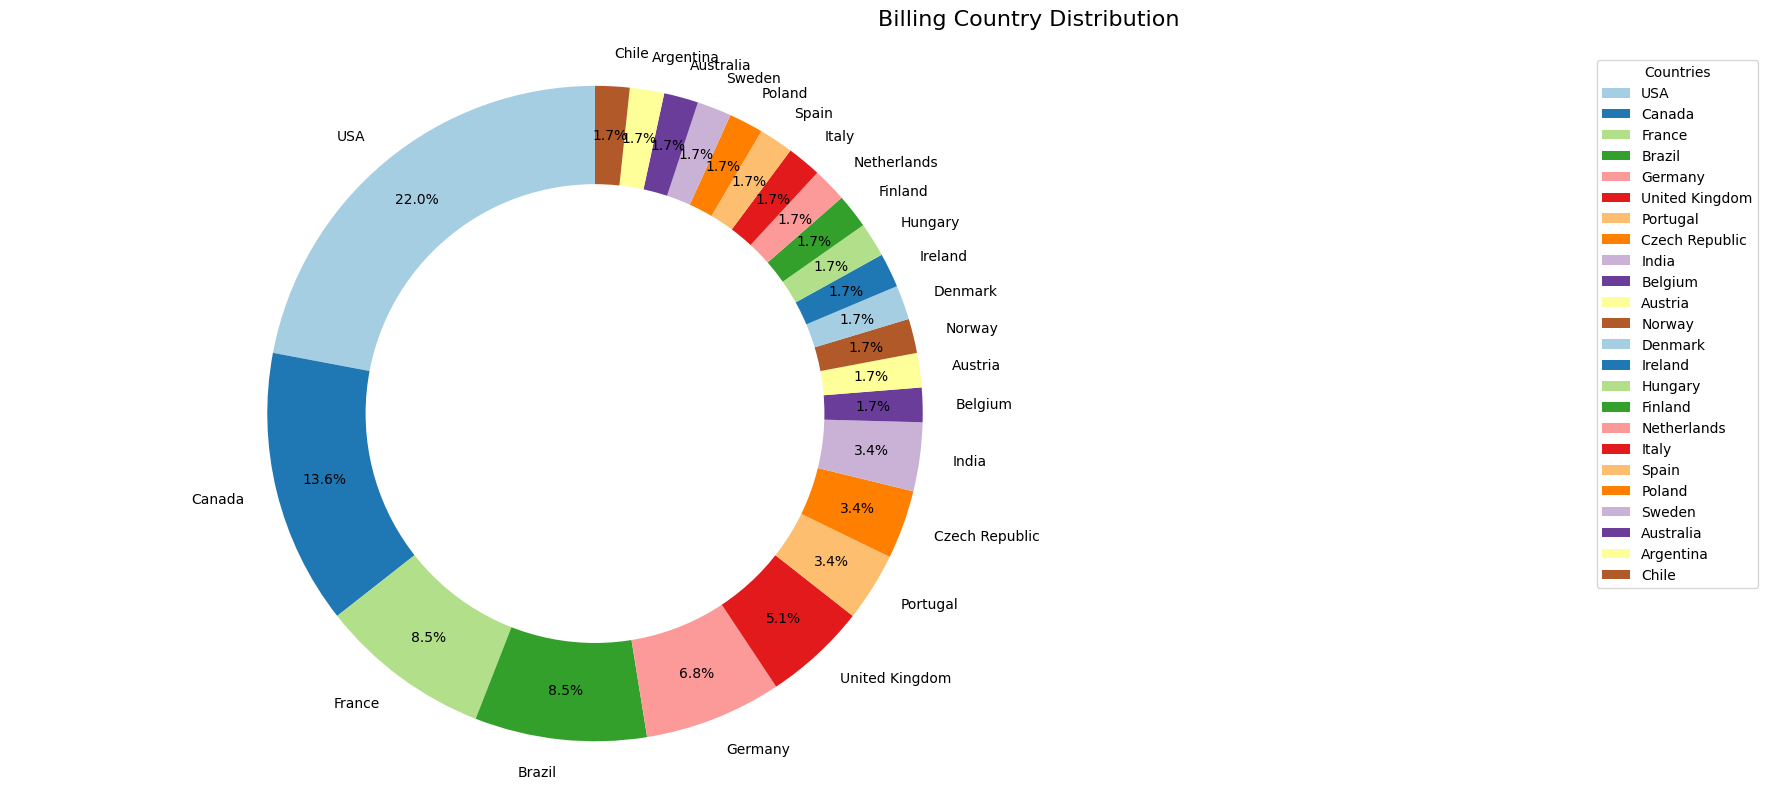

In [22]:
# Count occurrences of each BillingCountry
country_counts = customer['Country'].value_counts()

# Create a pie chart
plt.figure(figsize=(12, 8))

# Plot with more spacing and larger font size
plt.pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    pctdistance=0.85,
    labeldistance=1.1
)

# Draw a circle at the center of the pie chart to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Position the title at the top right
plt.title('Billing Country Distribution', fontsize=16, loc='right', pad=20)

plt.tight_layout()  # Adjust layout to make room for the labels

# Optionally, add a legend for clearer labeling
plt.legend(country_counts.index, title="Countries", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


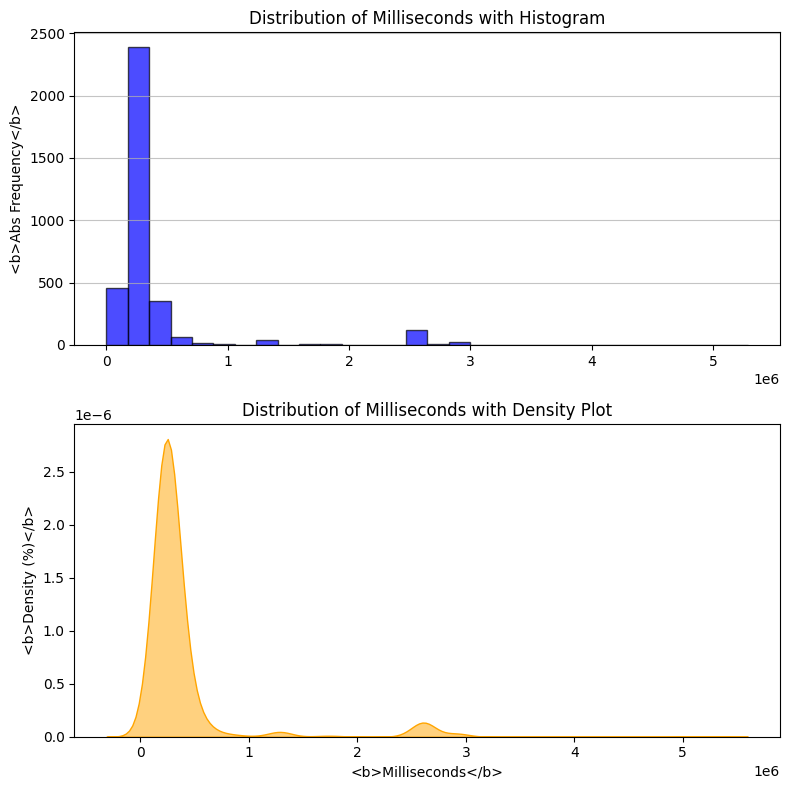

In [24]:
def plot_histogram(feature):
    """Plots histogram and density plot of a variable."""
    
    # Create a figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    
    # This is a count histogram
    ax1.hist(feature, bins=30, color='blue', alpha=0.7, edgecolor='black')
    ax1.set_title(f"Distribution of {feature.name} with Histogram")
    ax1.set_ylabel("<b>Abs Frequency</b>")
    ax1.grid(axis='y', alpha=0.75)

    # This is a density plot using seaborn
    sns.kdeplot(feature, ax=ax2, color='orange', fill=True, alpha=0.5)
    ax2.set_title(f"Distribution of {feature.name} with Density Plot")
    ax2.set_ylabel("<b>Density (%)</b>")
    ax2.set_xlabel(f"<b>{feature.name}</b>")
    
    plt.tight_layout()
    plt.show()


# Call the function with the appropriate column
plot_histogram(track['Milliseconds'])


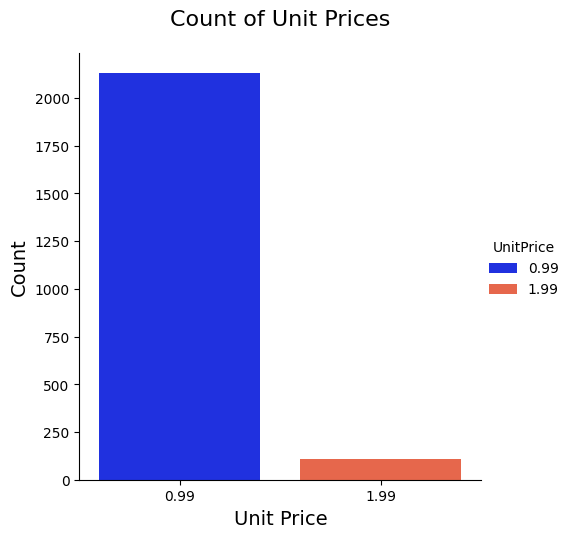

In [25]:
palette_colors = ["#0017ff", "#FF5733"]  # Custom colors

sns.catplot(x="UnitPrice", hue="UnitPrice", kind="count", data=invoiceline, palette=palette_colors)

plt.title('Count of Unit Prices', fontsize=16, loc='center', pad=20)
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

In [26]:
quantity = invoiceline.groupby('InvoiceId').size().reset_index(name='real_quantity')

# Merge the quantity back to the original DataFrame
invoiceline = invoiceline.merge(quantity, on='InvoiceId', how='left')
invoiceline_quantity = invoiceline.drop_duplicates(subset='InvoiceId', keep='first')
invoiceline_quantity

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,real_quantity
0,1,1,2,0.99,1,2
2,3,2,6,0.99,1,4
6,7,3,16,0.99,1,6
12,13,4,42,0.99,1,9
21,22,5,99,0.99,1,14
...,...,...,...,...,...,...
2206,2207,408,2953,0.99,1,4
2210,2211,409,2963,0.99,1,6
2216,2217,410,2989,0.99,1,9
2225,2226,411,3046,0.99,1,14


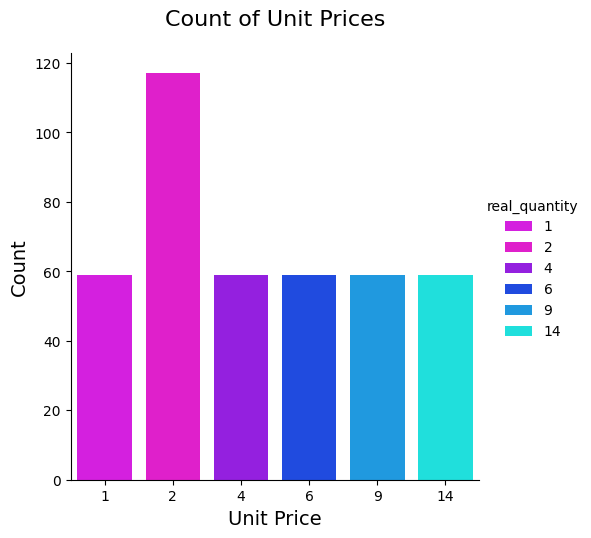

In [27]:
palette_colors = ['#f000ff', '#ff00e4', '#9b00ff', '#003aff', '#00a2ff', '#00fffb']  # Custom colors

sns.catplot(x="real_quantity", hue="real_quantity", kind="count", data=invoiceline_quantity, palette=palette_colors)

plt.title('Count of Unit Prices', fontsize=16, loc='center', pad=20)
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

In [31]:
def cal_spearmanr(c1, c2):

    alpha = 0.05

    correlation, p_value = stats.spearmanr(track[c1], track[c2])

    print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

    if p_value > alpha:
        print('Probably do not have monotonic relationship (fail to reject H0)')
    else:
        print('Probably have monotonic relationship (reject H0)')

In [32]:
cal_spearmanr('Milliseconds','UnitPrice')

Milliseconds, UnitPrice correlation : 0.4099206080846446, p : 4.576036687486155e-142
Probably have monotonic relationship (reject H0)


In [34]:
def cal_spearmanr(c1, c2):

    alpha = 0.05

    correlation, p_value = stats.spearmanr(invoice[c1], invoice[c2])

    print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

    if p_value > alpha:
        print('Probably do not have monotonic relationship (fail to reject H0)')
    else:
        print('Probably have monotonic relationship (reject H0)')

In [35]:
cal_spearmanr('Year', 'Total')

Year, Total correlation : 0.0037815163140809942, p : 0.9390026436130057
Probably do not have monotonic relationship (fail to reject H0)


In [36]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [37]:
categorical_features = [genre['Name'], customer['Country'], artist['Name'], invoice['BillingCountry']]
feature_names = ['Genre', 'Customer Country', 'Artist', 'Billing Country']

for feature, name in zip(categorical_features, feature_names):
    eta = correlation_ratio(feature, invoice['Total'])
    print(f'Correlation ratio for {name}: {eta}')

Correlation ratio for Genre: 0.21096096582844817
Correlation ratio for Customer Country: 0.18439421284616453
Correlation ratio for Artist: 0.8004711984682139
Correlation ratio for Billing Country: 0.06591568863770346


In [38]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(invoice.Total),stats.skew(track.Milliseconds),stats.skew(invoiceline_quantity.real_quantity)]},
                        index=['Total','Duration','Quantity'])  # Measure the skeweness of the required columns
Skewness

,Skewness
Total,1.209484
Duration,3.949738
Quantity,0.880439


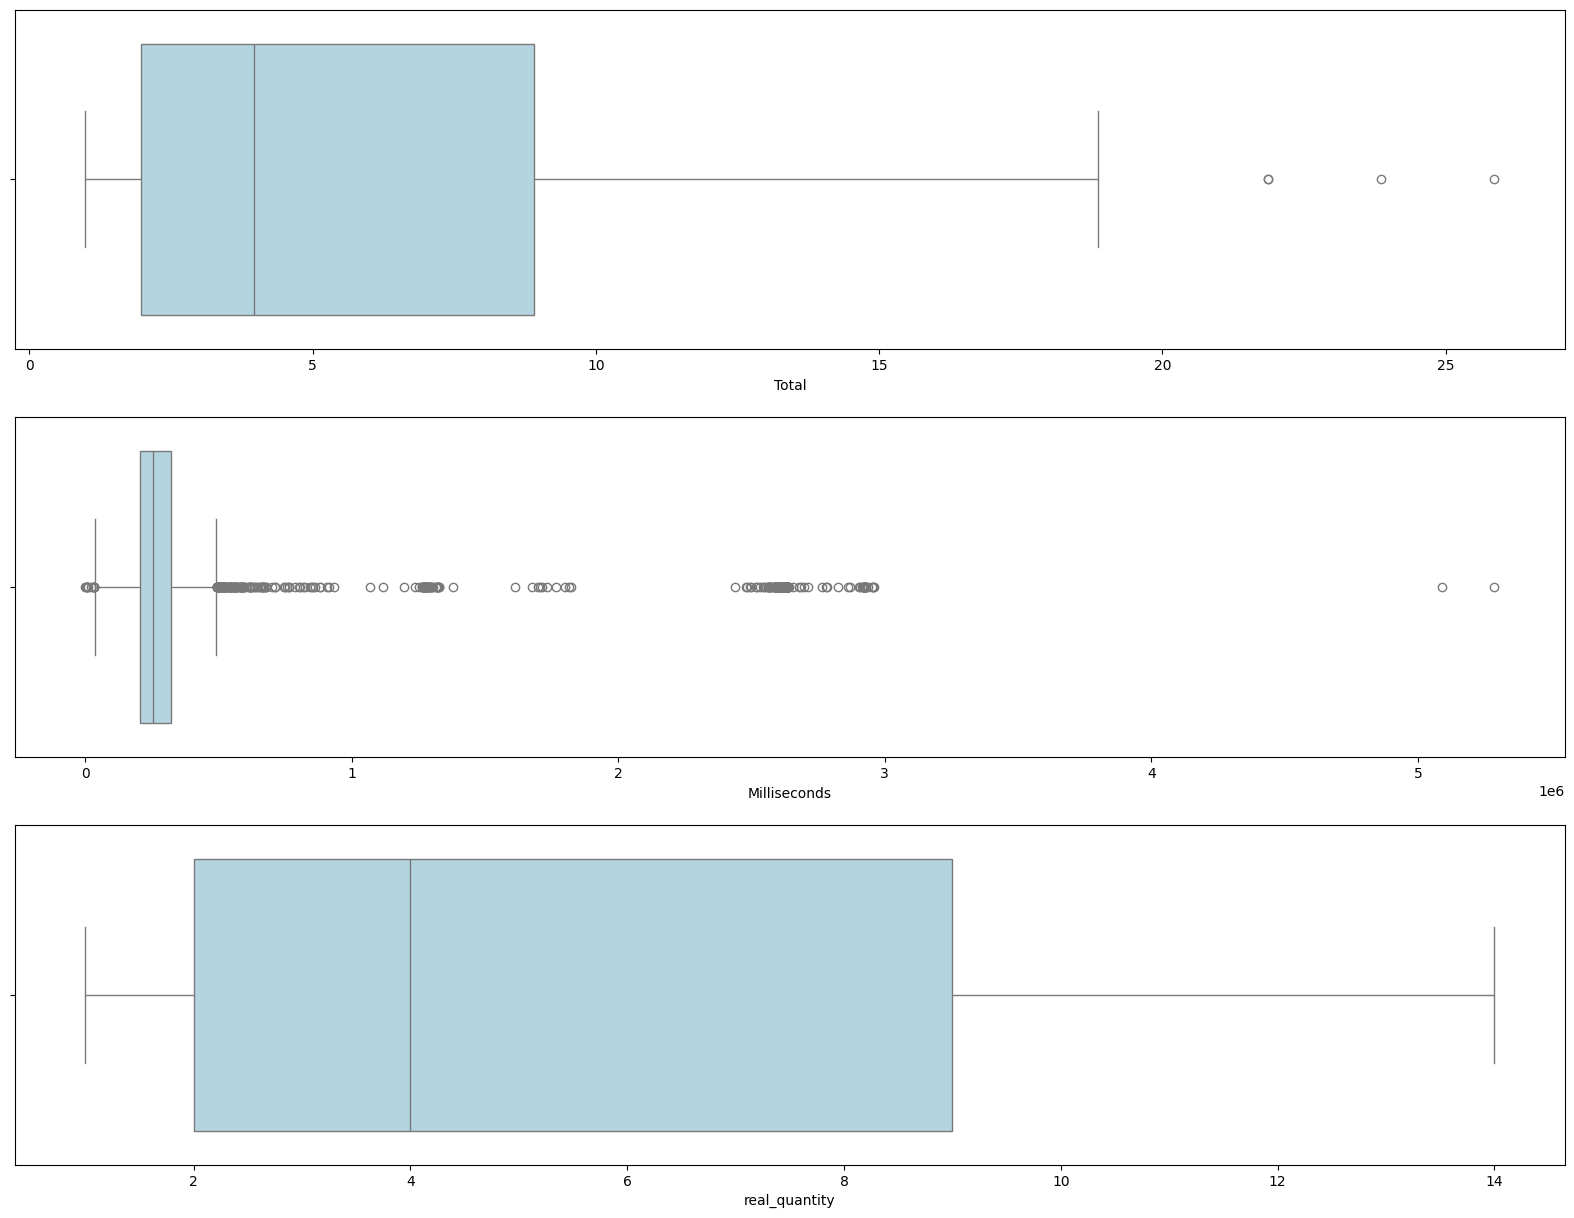

In [39]:
#Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= invoice.Total, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= track.Milliseconds, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= invoiceline_quantity.real_quantity, color='lightblue')

plt.show()

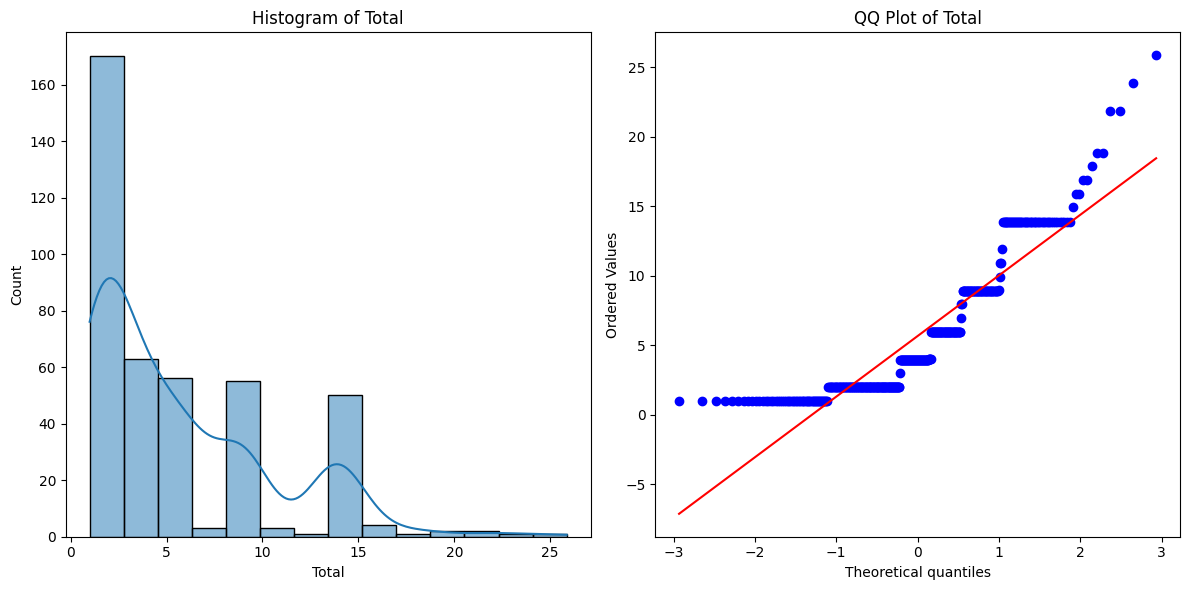

{'Total': ShapiroResult(statistic=np.float64(0.8367111017894937), pvalue=np.float64(3.4001843897448504e-20))}

In [40]:
def check_normality(data, column_name):
    shapito_test = shapiro(data[column_name])

    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Histogram of {column_name}')

    plt.subplot(1, 2, 2)
    probplot(data[column_name], dist='norm', plot=plt)
    plt.title(f'QQ Plot of {column_name}')

    plt.tight_layout()
    plt.show()

    return shapito_test

normality_results = {}
result = check_normality(invoice, 'Total')
normality_results['Total'] = result

normality_results

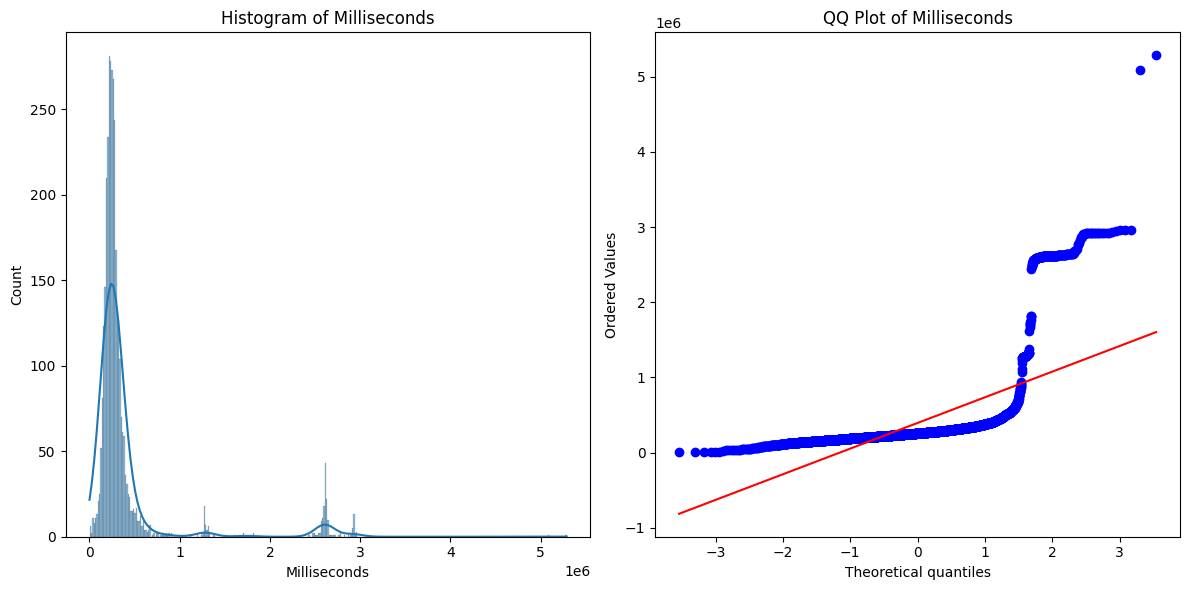

{'Milliseconds': ShapiroResult(statistic=np.float64(0.4069350980582944), pvalue=np.float64(2.7287436202313686e-75))}

In [41]:
normality_results = {}
result = check_normality(track, 'Milliseconds')
normality_results['Milliseconds'] = result

normality_results

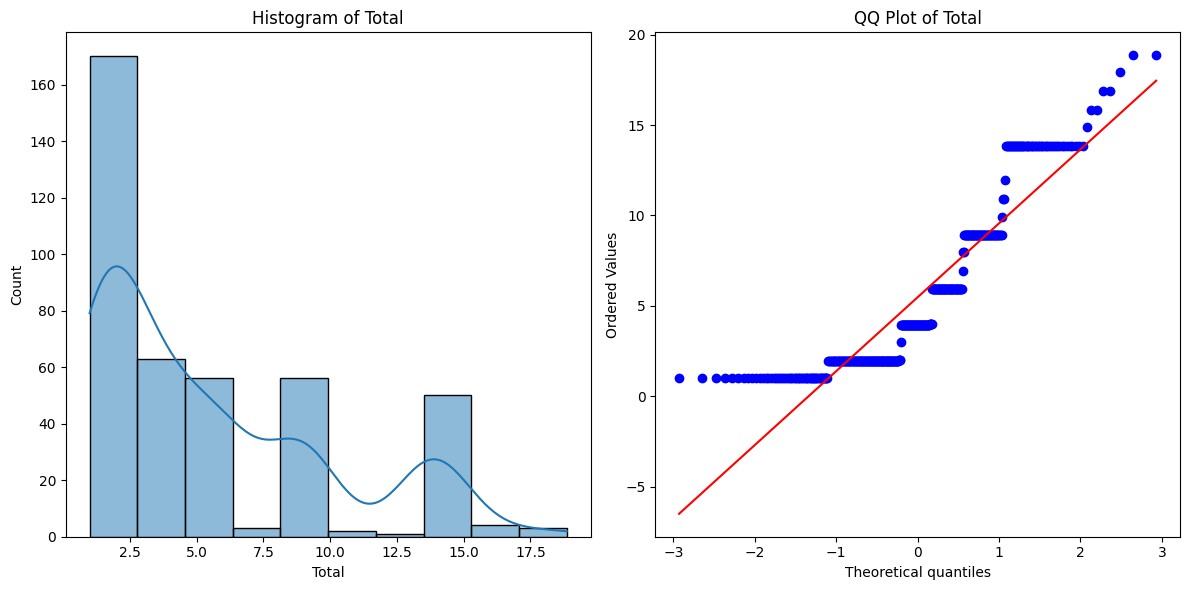

ShapiroResult(statistic=np.float64(0.8420163712858735), pvalue=np.float64(8.80711084513682e-20))

In [42]:
invoice['Total_zscore'] = zscore(invoice['Total'])

total_outliers = invoice[np.abs(invoice['Total_zscore']) > 3]

no_outliers = invoice[np.abs(invoice['Total_zscore']) <= 3]

check_normality(no_outliers, 'Total')

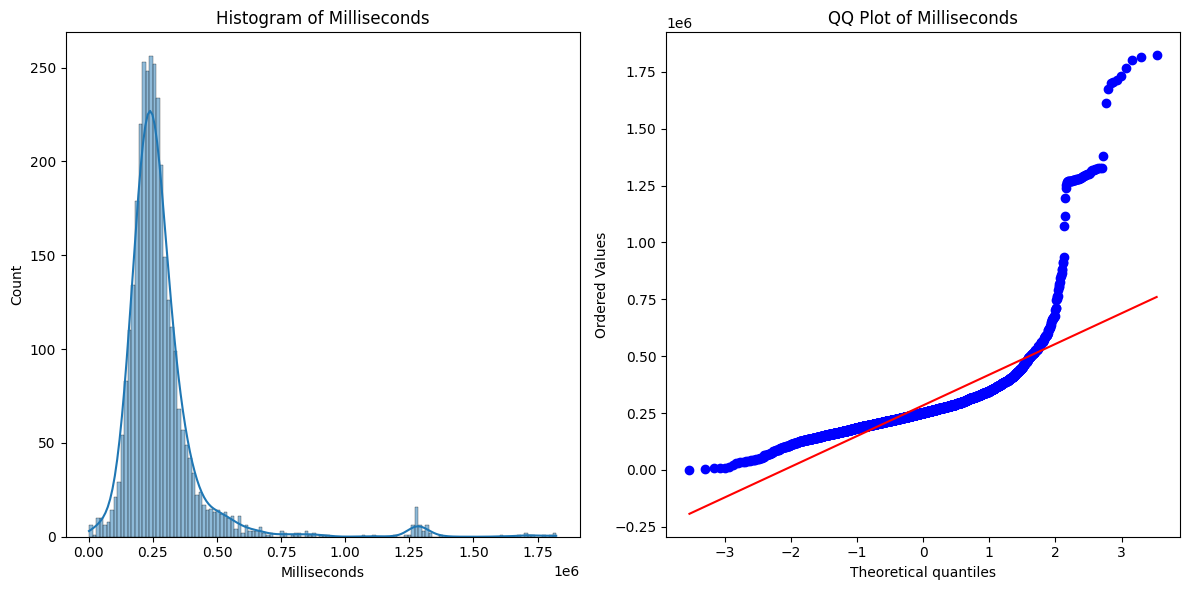

ShapiroResult(statistic=np.float64(0.595803918519912), pvalue=np.float64(1.5233975812756885e-66))

In [43]:
track['Milliseconds_zscore'] = zscore(track['Milliseconds'] )

track_outliers = track[np.abs(track['Milliseconds_zscore']) > 3]

no_outliers = track[np.abs(track['Milliseconds_zscore'] ) <= 3]

check_normality(no_outliers, 'Milliseconds')

Best transformation for Total: boxcox (p_value = 0.0000)


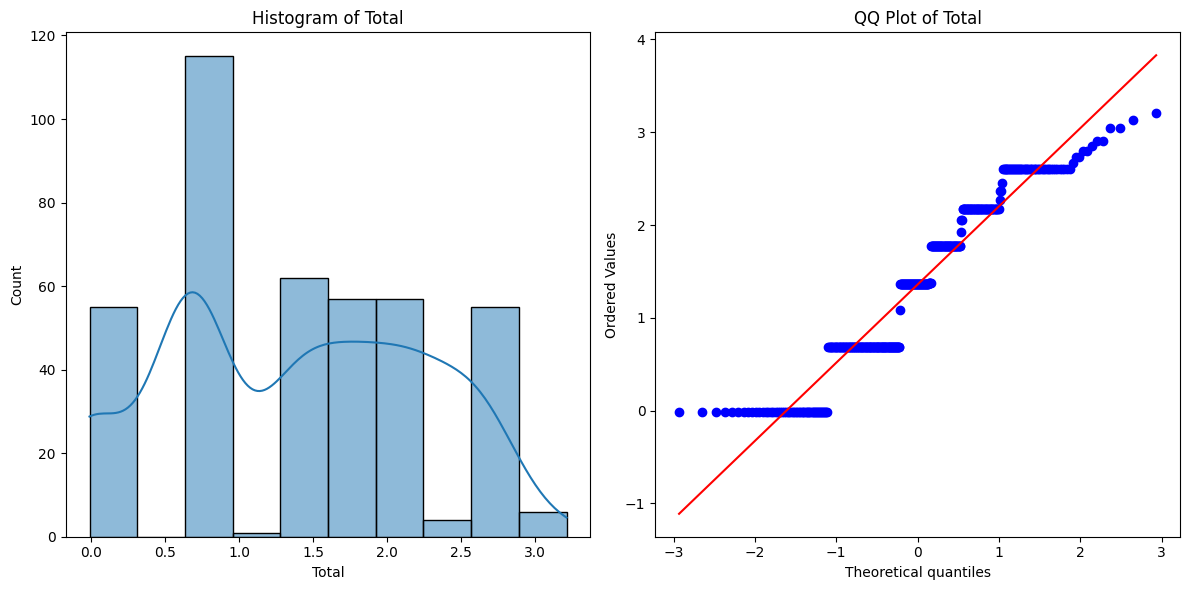

{'original': {'statistic': np.float64(0.8367111017894937),
  'p_value': np.float64(3.4001843897448504e-20)},
 'log': {'statistic': np.float64(0.9188718209609964),
  'p_value': np.float64(4.1935974156867107e-14)},
 'sqrt': {'statistic': np.float64(0.9052759578842028),
  'p_value': np.float64(2.3767024527845722e-15)},
 'boxcox': {'statistic': np.float64(0.9243968097112654),
  'p_value': np.float64(1.481794469644278e-13)}}

In [45]:
def find_best_transformation(df, column):
    results = {}
    org = df[column]
    
    # Check if the original data contains values <= 0
    if (org <= 0).any():
        boxcox_transformation, _ = boxcox(org + 1 - org.min())  # Shift to avoid negative values
    else:
        boxcox_transformation, _ = boxcox(org)

    log_transformed = np.log1p(org)
    sqrt_transformed = np.sqrt(org)

    transformations = {
        'original': org,
        'log': log_transformed,
        'sqrt': sqrt_transformed,
        'boxcox': boxcox_transformation
    }
    
    best_p_value = 0
    best_transformation = 'original'
    
    for name, transformed_data in transformations.items():
        shapiro_stat, p_value = shapiro(transformed_data)
        results[name] = {
            'statistic': shapiro_stat,
            'p_value': p_value
        }
        
        if p_value > best_p_value:
            best_p_value = p_value
            best_transformation = name
            
    print(f'Best transformation for {column}: {best_transformation} (p_value = {best_p_value:.4f})')
    
    # Assuming check_normality is a function defined elsewhere
    check_normality(pd.DataFrame({column: transformations[best_transformation]}), column)

    return results

# Ensure 'invoice' is a DataFrame and 'Total' exists as a column
normality_results = find_best_transformation(invoice, 'Total')
normality_results


Best transformation for Milliseconds: boxcox (p_value = 0.0000)


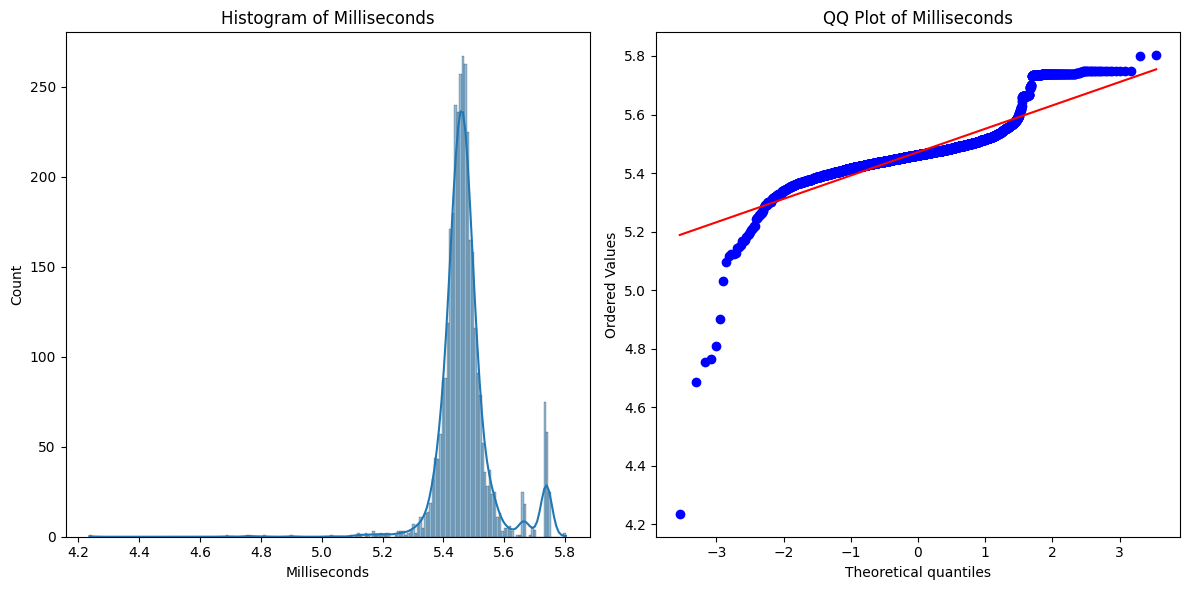

{'original': {'statistic': np.float64(0.4069350980582944),
  'p_value': np.float64(2.7287436202313686e-75)},
 'log': {'statistic': np.float64(0.7835589178607283),
  'p_value': np.float64(6.674840718838431e-56)},
 'sqrt': {'statistic': np.float64(0.577886775328528),
  'p_value': np.float64(2.028463077642434e-68)},
 'boxcox': {'statistic': np.float64(0.7942608618310703),
  'p_value': np.float64(5.268242446380545e-55)}}

In [46]:
def find_best_transformation(df, column):
    results = {}
    org = df[column]
    
    # Check if the original data contains values <= 0
    if (org <= 0).any():
        boxcox_transformation, _ = boxcox(org + 1 - org.min())  # Shift to avoid negative values
    else:
        boxcox_transformation, _ = boxcox(org)

    log_transformed = np.log1p(org)
    sqrt_transformed = np.sqrt(org)

    transformations = {
        'original': org,
        'log': log_transformed,
        'sqrt': sqrt_transformed,
        'boxcox': boxcox_transformation
    }
    
    best_p_value = 0
    best_transformation = 'original'
    
    for name, transformed_data in transformations.items():
        shapiro_stat, p_value = shapiro(transformed_data)
        results[name] = {
            'statistic': shapiro_stat,
            'p_value': p_value
        }
        
        if p_value > best_p_value:
            best_p_value = p_value
            best_transformation = name
            
    print(f'Best transformation for {column}: {best_transformation} (p_value = {best_p_value:.4f})')
    
    # Assuming check_normality is a function defined elsewhere
    check_normality(pd.DataFrame({column: transformations[best_transformation]}), column)

    return results

# Call the function for the 'Milliseconds' column in the 'track' DataFrame
normality_results = find_best_transformation(track, 'Milliseconds')
normality_results
